In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
import warnings
# Import necessary libraries
import pandas as pd  # For data manipulation//table
import numpy as np  # For math and numerical operations
import seaborn as sns  # For visualizations//chart
import matplotlib.pyplot as plt  # For plotting
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA#keep important info
from sklearn.feature_selection import VarianceThreshold#remove column but not mutch
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR, SVC
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.impute import SimpleImputer
import pickle
warnings.filterwarnings('ignore')



In [3]:
url ="https://raw.githubusercontent.com/kaveeshaadithya03/AIML/refs/heads/main/Online_Dating_Behavior_Dataset.csv"
data = pd.read_csv(url, encoding='latin-1')
df = pd.DataFrame(data)
data.head()

,Gender,PurchasedVIP,Income,Children,Age,Attractiveness,Matches
0,0,1,51777,3,47,5,70
1,1,0,36646,0,42,7,130
2,0,0,53801,1,25,5,0
3,0,0,56105,0,35,8,0
4,0,0,55597,1,36,6,0


In [4]:
df = pd.DataFrame(data)

# Handle missing values
print("Missing values before handling:") #print message
print(df.isnull().sum()) #how many miss values

# Fill missing numerical columns with mean
df.fillna(df.mean(), inplace=True)

# Fill missing categorical columns with mode
df.fillna(df.mode().iloc[0], inplace=True)

# Verify if all missing data is handled
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values before handling:
Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64

Missing values after handling:
Gender            0
PurchasedVIP      0
Income            0
Children          0
Age               0
Attractiveness    0
Matches           0
dtype: int64


     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  
0                 0  
1                 1  
2        

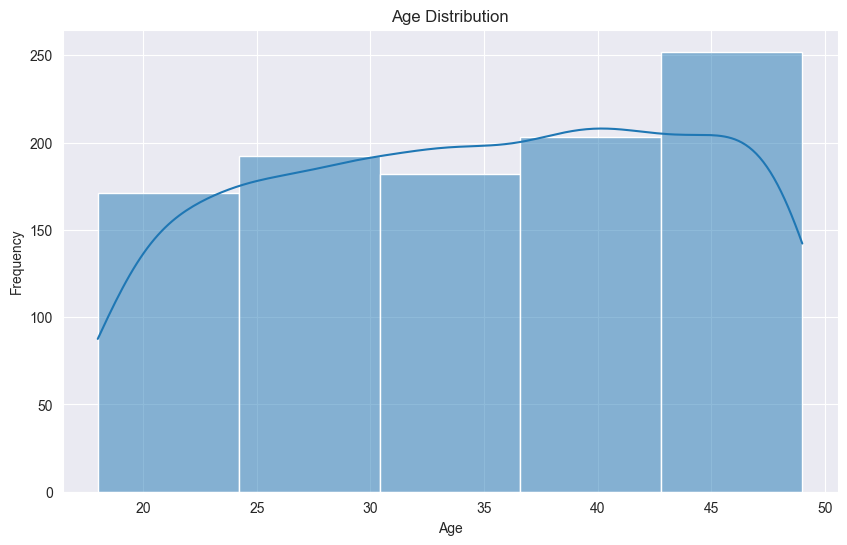

In [5]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Display the dataframe with the encoded column
print(df)

# **EDA 1: Histogram for Age Distribution (Member 1)**
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=True, bins=5)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  
0                 0  
1                 1  
2        

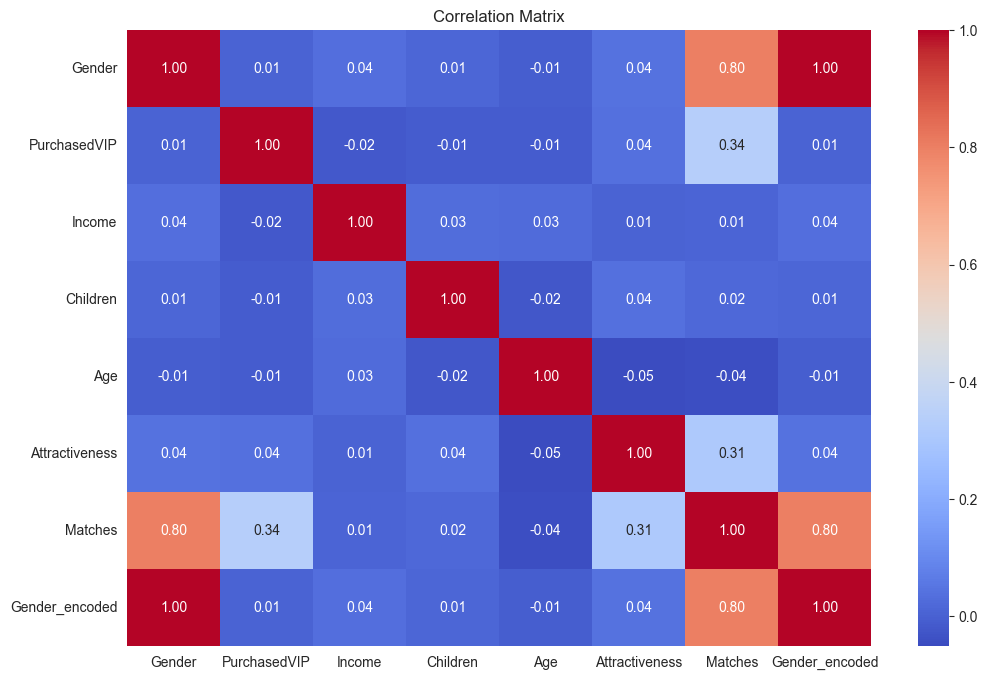

In [6]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df)  # Automatically encodes all categorical columns
print(df_encoded)

# Create a correlation matrix heatmap
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [7]:
# Handle Missing Data (none expected, but imputer as best practice)
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  
0                 0  
1                 1  
2        

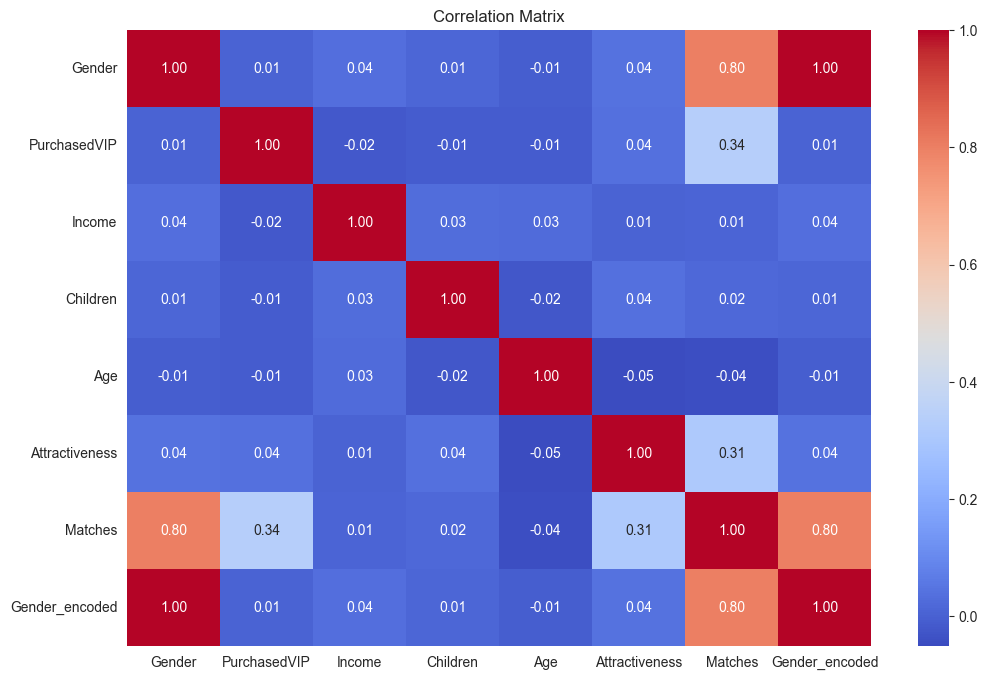

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Display the dataframe without outliers
print(df_no_outliers)

# Create a correlation matrix heatmap
correlation_matrix = df_no_outliers.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [9]:
# Normalization / Scaling
scaler = StandardScaler()
features_to_scale = ['Income', 'Children', 'Age', 'Attractiveness']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Save scaler for app.py
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

     Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0         0             1   51777         3   47               5       70   
1         1             0   36646         0   42               7      130   
2         0             0   53801         1   25               5        0   
3         0             0   56105         0   35               8        0   
4         0             0   55597         1   36               6        0   
..      ...           ...     ...       ...  ...             ...      ...   
995       0             0   36799         0   28               1        0   
996       0             1   43882         2   46               9       70   
997       1             0   49629         2   49               6      120   
998       1             0   45706         1   22               8      140   
999       0             0   43075         0   43               3        0   

     Gender_encoded  Age_minmax  Age_standard  
0                 0    0.93

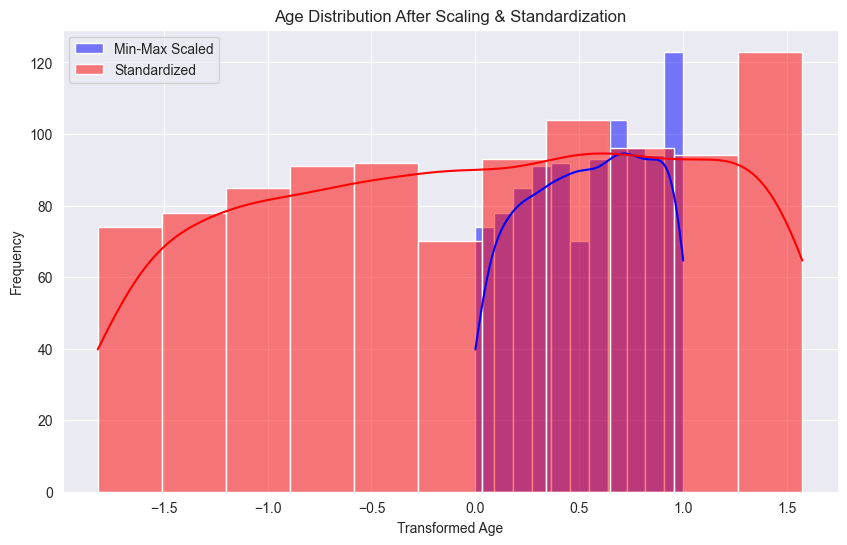

In [10]:
# Min-Max Scaling
scaler = MinMaxScaler()
df_no_outliers['Age_minmax'] = scaler.fit_transform(df_no_outliers[['Age']])

# Standardization (Z-score)
std_scaler = StandardScaler()
df_no_outliers['Age_standard'] = std_scaler.fit_transform(df_no_outliers[['Age']])
print(df_no_outliers)

# EDA Visualization: Histogram comparison
plt.figure(figsize=(10,6))
sns.histplot(df_no_outliers['Age_minmax'], kde=True, color="blue", label="Min-Max Scaled")
sns.histplot(df_no_outliers['Age_standard'], kde=True, color="red", label="Standardized")
plt.legend()
plt.title("Age Distribution After Scaling & Standardization")
plt.xlabel("Transformed Age")
plt.ylabel("Frequency")
plt.show()


Selected features after VarianceThreshold:
   Gender  PurchasedVIP  Income  Children  Age  Attractiveness  Matches  \
0       0             1   51777         3   47               5       70   
1       1             0   36646         0   42               7      130   
2       0             0   53801         1   25               5        0   
3       0             0   56105         0   35               8        0   
4       0             0   55597         1   36               6        0   

   Gender_encoded  
0               0  
1               1  
2               0  
3               0  
4               0  


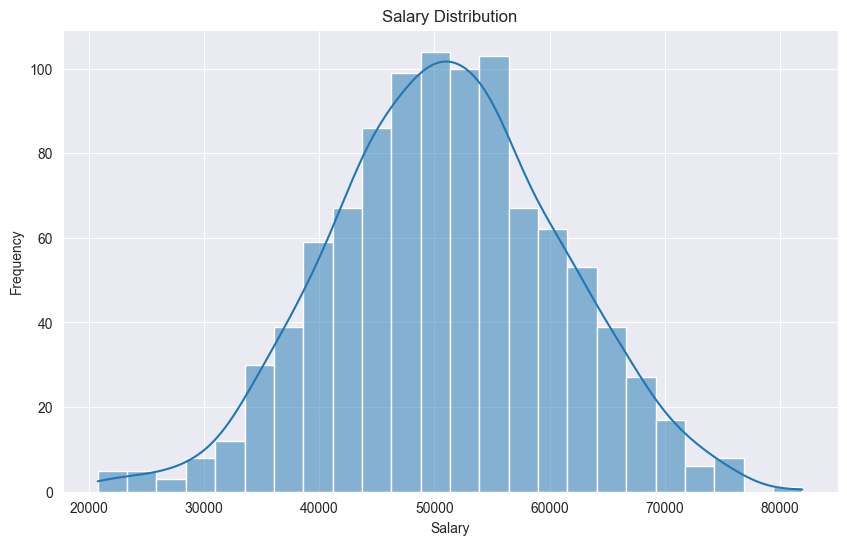

In [11]:
 # Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
df_selected_array = selector.fit_transform(df)

# Get selected feature names
selected_columns = df.columns[selector.get_support()]     # method returns boolean array use true or false indicate features
df_selected = pd.DataFrame(df_selected_array, columns=selected_columns) # create new data frame for selected features

print("Selected features after VarianceThreshold:")
print(df_selected.head())

# Create histogram for Salary distribution (using df_selected, no outliers removed)
plt.figure(figsize=(10,6))
sns.histplot(df_selected['Income'], kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

[[ 7.88553058e+02 -6.19116428e+00]
 [-1.43424448e+04  5.44522782e+01]
 [ 2.81254988e+03 -7.60834131e+01]
 ...
 [-1.35944499e+03  4.38914198e+01]
 [-5.28244485e+03  6.42797602e+01]
 [-7.91344970e+03 -7.58512892e+01]]


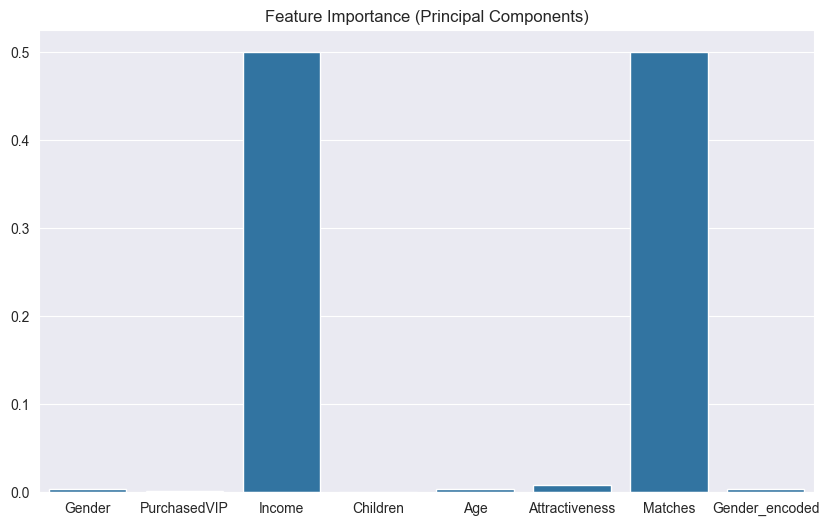

In [12]:
# ensure all data is numeric for PCA
numeric_df = df.select_dtypes(include=[np.number])

pca = PCA(n_components=2)
df_pca = pca.fit_transform(numeric_df)

print(df_pca)

features =numeric_df.columns.tolist()
importances = np.abs(pca.components_).mean(axis=0)

plt.figure(figsize=(10,6))
sns.barplot(x=features, y=importances)
plt.title('Feature Importance (Principal Components)')
plt.show()

In [13]:
# Feature Engineering
data['Age_Attract'] = data['Age'] * data['Attractiveness']
data['Income_VIP'] = data['Income'] * data['PurchasedVIP']

In [14]:
# EDA & Visualization
# Correlation with Matches
print("\nCorrelation with Matches:\n", data.corr()['Matches'])


Correlation with Matches:
 Gender            0.800911
PurchasedVIP      0.338011
Income            0.007140
Children          0.016435
Age              -0.043462
Attractiveness    0.313557
Matches           1.000000
Age_Attract      -0.040980
Income_VIP        0.020860
Name: Matches, dtype: float64


In [15]:
# Value Counts
print("\nGender Counts:\n", data['Gender'].value_counts())
print("\nPurchasedVIP Counts:\n", data['PurchasedVIP'].value_counts())
print("\nChildren Counts:\n", data['Children'].value_counts())
print("\nAge Counts:\n", data['Age'].value_counts())
print("\nAttractiveness Counts:\n", data['Attractiveness'].value_counts())


Gender Counts:
 Gender
1.0    510
0.0    490
Name: count, dtype: int64

PurchasedVIP Counts:
 PurchasedVIP
0.0    526
1.0    474
Name: count, dtype: int64

Children Counts:
 Children
-0.981186    412
 0.022072    294
 1.025330    198
 2.028587     96
Name: count, dtype: int64

Age Counts:
 Age
-1.051708    48
 1.573187    46
 1.463816    40
 0.588851    40
-0.067372    38
 0.260740    38
 1.354446    37
 0.479481    36
-0.504855    35
 0.916963    35
 1.026334    34
-1.598561    32
-0.286114    32
-0.723596    32
-0.614225    32
-0.176743    32
 0.807593    31
 1.245075    31
 0.698222    30
 0.041998    30
-1.270449    30
 1.135704    29
 0.370110    28
-0.832967    27
 0.151369    25
-0.395484    25
-1.379820    24
-1.489190    24
-1.707931    23
-1.161078    19
-1.817302    19
-0.942337    18
Name: count, dtype: int64

Attractiveness Counts:
 Attractiveness
 0.133198    116
 0.487446    115
 1.550193    106
-0.575300    104
-0.929549    104
 1.195944    104
-1.283797     94
-0.2210

           Gender  PurchasedVIP        Income     Children          Age  \
count  1000.00000   1000.000000   1000.000000  1000.000000  1000.000000   
mean      0.51000      0.474000  50988.447000     0.978000    34.616000   
std       0.50015      0.499573   9889.336141     0.997251     9.147799   
min       0.00000      0.000000  20786.000000     0.000000    18.000000   
25%       0.00000      0.000000  44358.500000     0.000000    27.000000   
50%       1.00000      0.000000  50841.500000     1.000000    35.000000   
75%       1.00000      1.000000  57396.000000     2.000000    43.000000   
max       1.00000      1.000000  81931.000000     3.000000    49.000000   

       Attractiveness     Matches  Gender_encoded  
count     1000.000000  1000.00000      1000.00000  
mean         5.624000    76.05000         0.51000  
std          2.824288    52.71315         0.50015  
min          1.000000     0.00000         0.00000  
25%          3.000000     0.00000         0.00000  
50%         

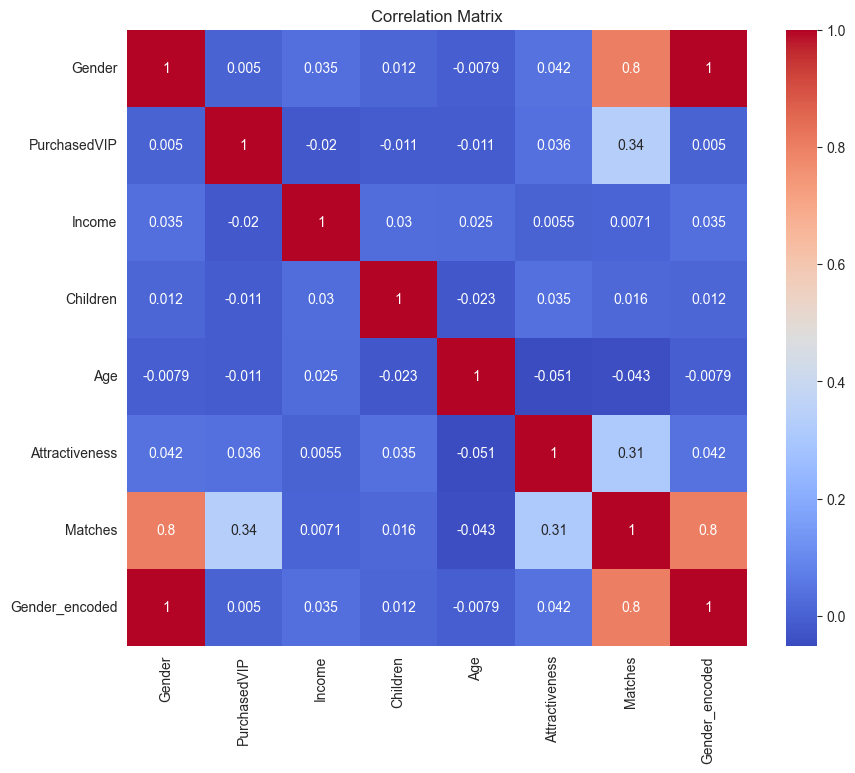

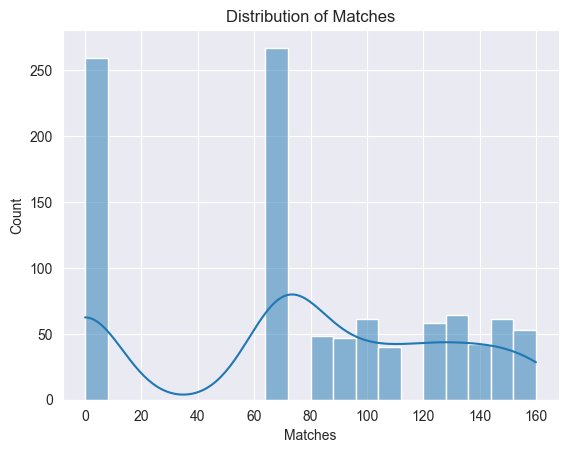

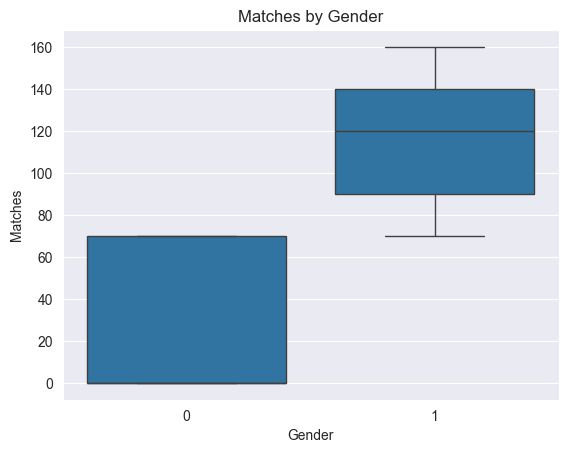

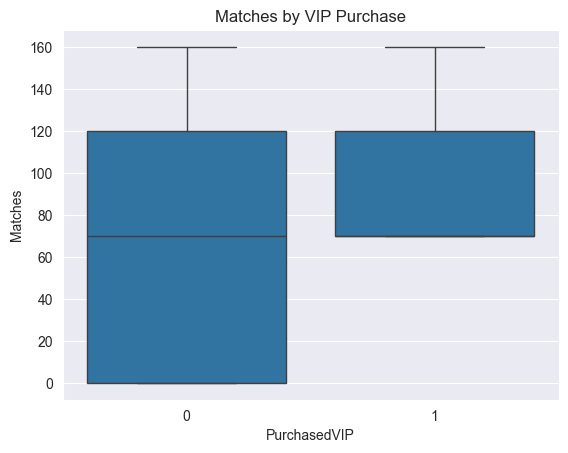

In [16]:
# Summary statistics
print(df.describe())

# Correlation matrix
print(df.corr())

# Visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of target variable
sns.histplot(df['Matches'], bins=20, kde=True)
plt.title('Distribution of Matches')
plt.show()

# Boxplot of Matches by Gender (0: likely male, 1: female based on common encoding)
sns.boxplot(x='Gender', y='Matches', data=df)
plt.title('Matches by Gender')
plt.show()

# Boxplot of Matches by PurchasedVIP
sns.boxplot(x='PurchasedVIP', y='Matches', data=df)
plt.title('Matches by VIP Purchase')
plt.show()

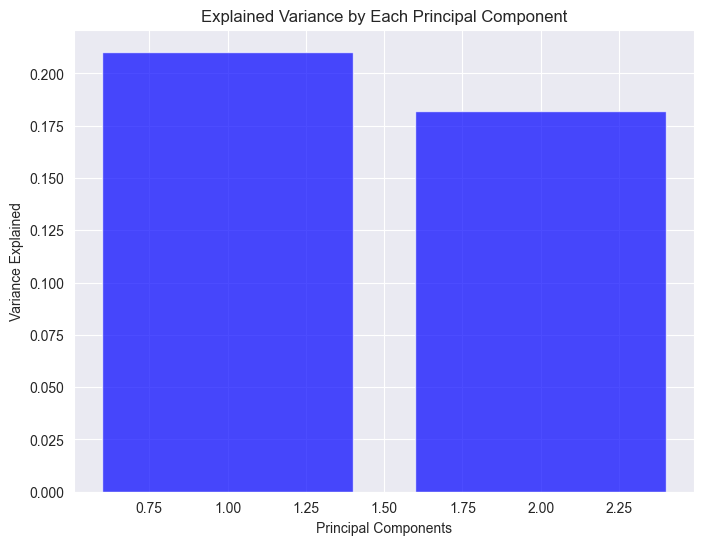

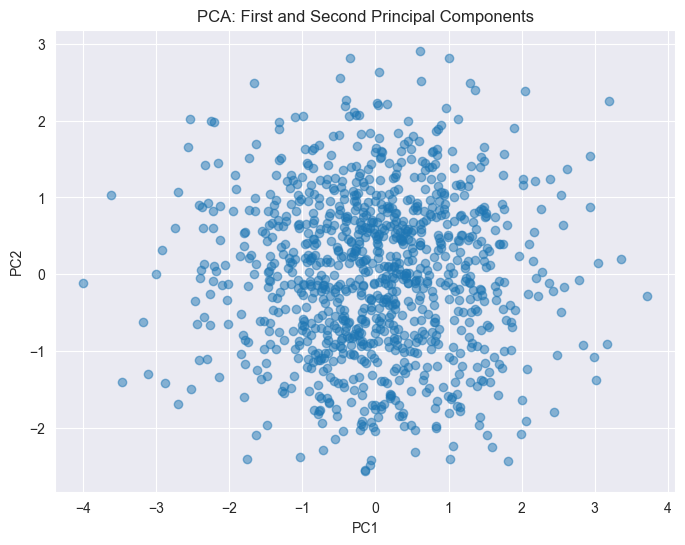


PCA Explained Variance Ratio: [0.21038559 0.18194594]


In [17]:
# Dimensionality Reduction: PCA
numerical_columns = ['Income', 'Children', 'Age', 'Attractiveness']
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data.drop('Matches', axis=1))
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['Matches'] = data['Matches'].values
# Visualize the explained variance ratio to see how much variance each component explains
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Explained Variance by Each Principal Component')
plt.show()

# Visualizing the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First and Second Principal Components')
plt.show()

print("\nPCA Explained Variance Ratio:", pca.explained_variance_ratio_)

In [18]:
# Clustering
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data.drop('Matches', axis=1))

In [19]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(data.drop('Matches', axis=1))

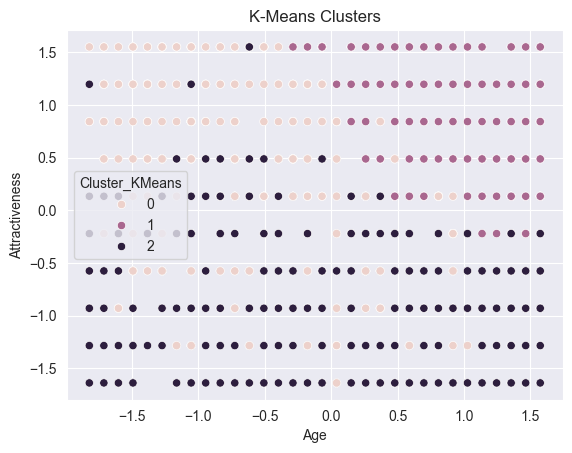

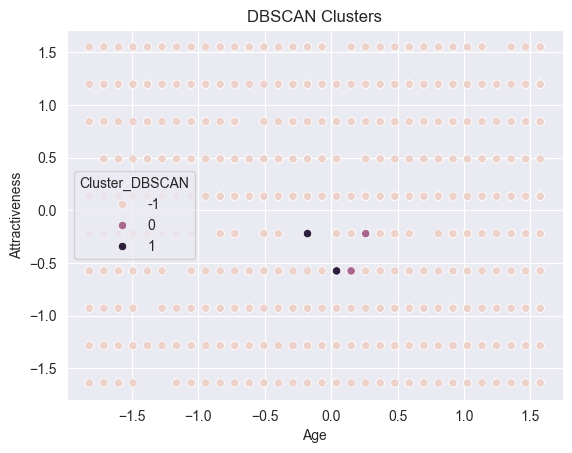

In [20]:
# Visualize K-Means Clusters
sns.scatterplot(x='Age', y='Attractiveness', hue='Cluster_KMeans', data=data)
plt.title('K-Means Clusters')
plt.show()

sns.scatterplot(x='Age', y='Attractiveness', hue='Cluster_DBSCAN', data=data)
plt.title('DBSCAN Clusters')
plt.show()

In [21]:
# Prepare Data for Models
# Regression: Predict continuous Matches
X_reg = data.drop(['Matches', 'Cluster_KMeans', 'Cluster_DBSCAN'], axis=1)
y_reg = data['Matches']

In [22]:
# Classification: Bin Matches into low (0-50), medium (51-100), high (>100)
bins = [0, 50, 100, float('inf')]
labels = [0, 1, 2]  # low, medium, high
data['Matches_Class'] = pd.cut(data['Matches'], bins=bins, labels=labels, include_lowest=True)
# Drop any rows with NaN in Matches_Class (though include_lowest should prevent this if min >=0)
data = data.dropna(subset=['Matches_Class'])
X_clf = data.drop(['Matches', 'Matches_Class', 'Cluster_KMeans', 'Cluster_DBSCAN'], axis=1)
y_clf = data['Matches_Class']

In [23]:
# Train-Test Split
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.25, random_state=42)

In [24]:
# Regression Models
models_reg = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(max_iter=2000, hidden_layer_sizes=(100, 50), random_state=42)
}

results_reg = {}
for name, model in models_reg.items():
    model.fit(X_reg_train, y_reg_train)
    y_pred = model.predict(X_reg_test)
    mse = mean_squared_error(y_reg_test, y_pred)
    mae = mean_absolute_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    cv_r2 = cross_val_score(model, X_reg, y_reg, cv=5, scoring='r2').mean()
    results_reg[name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'CV_R2': cv_r2}

In [25]:
# Classification Models
models_clf = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'SVC': SVC(probability=True, random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=2000, hidden_layer_sizes=(100, 50), random_state=42)
}

results_clf = {}
for name, model in models_clf.items():
    model.fit(X_clf_train, y_clf_train)
    y_pred = model.predict(X_clf_test)
    acc = accuracy_score(y_clf_test, y_pred)
    f1 = f1_score(y_clf_test, y_pred, average='weighted')
    prec = precision_score(y_clf_test, y_pred, average='weighted')
    rec = recall_score(y_clf_test, y_pred, average='weighted')
    auc = roc_auc_score(y_clf_test, model.predict_proba(X_clf_test), multi_class='ovr')
    cv_acc = cross_val_score(model, X_clf, y_clf, cv=5, scoring='accuracy').mean()
    results_clf[name] = {'Accuracy': acc, 'F1': f1, 'Precision': prec, 'Recall': rec, 'AUC': auc, 'CV_Acc': cv_acc}
    print(f"\n{name} Confusion Matrix:\n", confusion_matrix(y_clf_test, y_pred))


LogisticRegression Confusion Matrix:
 [[ 64   0   0]
 [  0 106   0]
 [  0   2  78]]

DecisionTreeClassifier Confusion Matrix:
 [[ 64   0   0]
 [  0 106   0]
 [  0   0  80]]

RandomForestClassifier Confusion Matrix:
 [[ 64   0   0]
 [  0 106   0]
 [  0   0  80]]

SVC Confusion Matrix:
 [[ 64   0   0]
 [  0 106   0]
 [  0   2  78]]

MLPClassifier Confusion Matrix:
 [[ 64   0   0]
 [  0 106   0]
 [  0   0  80]]


In [28]:
# Model Comparison
print("\nRegression Results:\n", pd.DataFrame(results_reg).T)
print("\nClassification Results:\n", pd.DataFrame(results_clf).T)


Regression Results:
                                MSE        MAE        R2     CV_R2
LinearRegression        514.851412  18.818878  0.811864  0.820016
Lasso                   523.303854  19.106581  0.808775  0.818643
DecisionTreeRegressor     0.000000   0.000000  1.000000  1.000000
RandomForestRegressor     0.000000   0.000000  1.000000  1.000000
SVR                    1802.242591  31.846916  0.341428  0.352009
MLPRegressor              0.354650   0.397978  0.999870  0.999870

Classification Results:
                         Accuracy        F1  Precision  Recall  AUC  CV_Acc
LogisticRegression         0.992  0.991987   0.992148   0.992  1.0   0.989
DecisionTreeClassifier     1.000  1.000000   1.000000   1.000  1.0   1.000
RandomForestClassifier     1.000  1.000000   1.000000   1.000  1.0   1.000
SVC                        0.992  0.991987   0.992148   0.992  1.0   0.989
MLPClassifier              1.000  1.000000   1.000000   1.000  1.0   0.999


In [26]:
# Hyperparameter Tuning: RandomForest
# Regression
param_grid_rf_reg = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'criterion': ['squared_error', 'absolute_error']}
grid_rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_reg, cv=5)
grid_rf_reg.fit(X_reg_train, y_reg_train)
best_rf_reg = grid_rf_reg.best_estimator_
print("\nBest RandomForestRegressor Params:", grid_rf_reg.best_params_)


Best RandomForestRegressor Params: {'criterion': 'squared_error', 'max_depth': None, 'n_estimators': 50}


In [27]:
# Classification
param_grid_rf_clf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
grid_rf_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf_clf, cv=5)
grid_rf_clf.fit(X_clf_train, y_clf_train)
best_rf_clf = grid_rf_clf.best_estimator_
print("\nBest RandomForestClassifier Params:", grid_rf_clf.best_params_)


Best RandomForestClassifier Params: {'max_depth': None, 'n_estimators': 50}


In [29]:
# Ethical and Bias Analysis
print("\nMean Matches by Gender:\n", data.groupby('Gender')['Matches'].mean())
# Note: Check if significant differences exist (potential bias).
# Suggestions: Use fairness-aware algorithms, audit for bias, collect diverse data.


Mean Matches by Gender:
 Gender
0.0     33.000000
1.0    117.411765
Name: Matches, dtype: float64


In [30]:
# Save Best Model (RandomForestRegressor for app.py)
with open('predictor.pickle', 'wb') as file:
    pickle.dump(best_rf_reg, file)